<a href="https://colab.research.google.com/github/ManasviAtGitHub/Python-practice/blob/main/Statistics_for_Data_Science_2_Data_and_Sampling_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd drive/MyDrive/Datasets_py

/content/drive/MyDrive/Datasets_py


**Random Sampling and Sample Bias**

**Sample** is a subset of data from larger dataset (Population (itself is large sometimes imaginary set of data)).
Random Sampling 

**Random sampling** is a process in which each available member of the population being sampled has an equal chance of being chosen. The sample that results is **simple random sample**.

Sampling can be done **with replacement**, in which observations are put back in the population after each draw.(alternative is **without replacement**)

**Stratified sampling** is dividing the population into strata (levels) and randomly sampling from each strata.

**Stratum** is a homogeneous subgroup of a population with common characteristics.

**Bias** is a systematic error

**Sample bias** is sample that misrepresents the population.

**Selection Bias**

**Selection bias** is bias resulting from the way in which observations are selected.

**Data snooping** is extensive hunting through data in search of something interesting.

**Vast search effect** is bias or nonreproducibility resulting from repeated data modeling, or modeling data wiht large numbers of predictor variables.

**Regression to the mean** refers to phenomenon involving successive measurements on a given variable where extreme observations tend to be followed by more central ones.

**Sampling Distribution**

**Sample statistic** is a metric calculated for a sample of data drawn from a larger population.

**Data distribution** is frequency distribution of individual values in a data set.

**Sampling distribution** is frequency distribution of a sample statistic over many samples or resamples.

**Central limit theorem** is tendency of the sampling distribution to take on a normal shape as sample size rises.

**Standard error** is variability(standard deviation) of a sample statistic over many samples (not same as Standard deviation).



In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pylab as plt

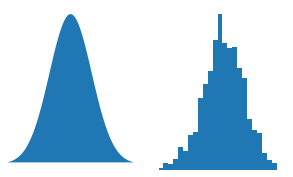

In [ ]:
np.random.seed(1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size =1000)
fig, axes = plt.subplots(ncols = 2, figsize=(5,3))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3,3)

ax = axes[1]
ax.hist(xsample,bins = 30)
ax.set_axis_off()
ax.set_xlim(-3,3)

plt.show()

**Sampling distribution of a Statistic**

In [ ]:
loans = pd.read_csv('loans_income.csv').squeeze('columns') #returns without header

In [ ]:
loans.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [ ]:
#take 1000 samples
sample_data = pd.DataFrame({
    'income' : loans.sample(1000),
    'type' : 'Data'
})
#running mean of 5 samples each, 1000 times
sample_mean_5 = pd.DataFrame({
    'income' : [loans.sample(5).mean() for _ in range(1000)],
    'type' : 'Mean of 5'
})
#running mean of 20 samples each, 1000 times
sample_mean_20 = pd.DataFrame({
    'income' : [loans.sample(20).mean() for _ in range(1000)],
    'type' : 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_5, sample_mean_20])

In [ ]:
results.head()

,income,type
37018,70000.0,Data
8537,49000.0,Data
16357,70000.0,Data
22719,54000.0,Data
39538,38000.0,Data


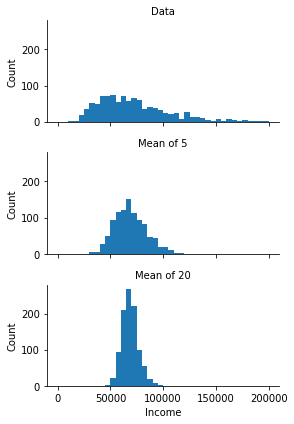

In [ ]:
#using facet grid
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
plt.show()

👆 that's central limit theorem

**Bootstrap**
is an easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional sample, with replacement, from the sample itself and recalculate the statistic or model for each resample.

**Bootstrap sample** is a sample taken with replacement from an observed dataset.

**Resampling** is the process of taking repeated samples from observed data, it includes both bootstrap and permutation(shuffling) procedures.

In [ ]:
results = []
for nrepeat in range(1000):
  sample = resample(loans)
  results.append(sample.median())
results = pd.Series(results)

print(f'original: {loans.median()}')
print(f'bias: {results.mean() - loans.median()}')
print(f'std. error : {results.std()}')

original: 62000.0
bias: -86.18450000000303
std. error : 235.45724096334604


**Confidence Intervals**

They are another way to understand potential error in a sample estimate. This is done by presenting an estimate as range to account for uncertainty

**Confidence level** is the percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.

**Interval endpoints** is the top and bottom of confidence interval

Confidence intervals always come with a coverage level, expressed as a (high) % say 90 % or 95 %.

Think in terms that it is the interval that encloses the central x % of the bootstap sampling distribution of a sample statistic. 

In [ ]:
print(loans.mean())
sample20 = resample(loans, n_samples=20, replace=False)
print(sample20.mean())


68760.51844
60821.4


In [ ]:
results = []
for nrepeat in range(500):
  sample = resample(sample20)
  results.append(sample.mean())

results = pd.Series(results)

results.head()

0    58363.0
1    64082.8
2    60041.6
3    56291.4
4    61724.4
dtype: float64

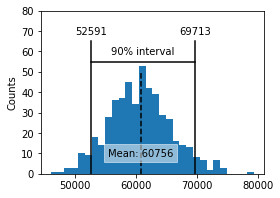

In [ ]:
confidence_interval = list(results.quantile([0.05,0.95]))
ax = results.plot.hist(bins=30, figsize=(4,3))
ax.plot(confidence_interval, [55, 55], color ="black")
for x in confidence_interval:
  ax.plot([x,x], [0,65], color='black')
  ax.text(x, 70, f'{x:.0f}', horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval)/2, 60, '90% interval',horizontalalignment='center', verticalalignment='center' )

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0,50],color ="black", linestyle="--")
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox = dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment = 'center', verticalalignment ='center'
        )
ax.set_ylim(0,80)
ax.set_ylabel('Counts')
plt.show()

**Normal Distribution**

**Error** is the difference between a data point and a predicted or average value.

**Standardize** is subtracting the mean and divide by standard deviation.

**z-score** is the result of standardizing an individual data point.

**Standard normal** is a normal distribution with mean = 0 and standard deviation = 1.

**QQ-Plot** is to visualize how close a sample distribution is to a specified distribution.

Standard Normal and QQ Plots

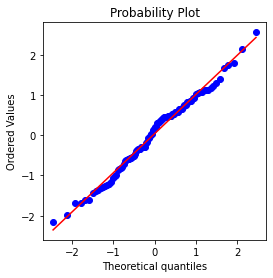

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.show()

**Long Tailed Distributions**

**Tail** is the long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.

**Skew** is where one tail of distribution is longer than the other.

In [ ]:
sp = pd.read_csv('sp500_data.csv')

In [ ]:
sp.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


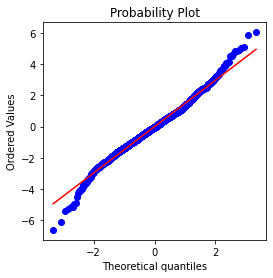

In [ ]:
nflx = sp.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx, plot=ax)
plt.show()

**Student's t-Distribution**

It is a normally shapped distribution, except that it is a bit thicker and longer on the tails.
Its a family of distributions resembling the normal distribution but with thicker tail.

"*The larger the sample, the more normally shaped the t-distribution becomes*"

**Degree of freedom** is a parameter that allows the t-distribution to adjust to different sample sizes, statistics and number of groups.

**Binomial Distribution**

Distribution of number of successes in x trials. (also called Bernoulli distribution)


**Trial** is an event with a discrete outcome.

**Success** is outcome of interest for a trial.

**Binomial** is having two outcomes.

**Binomial Trial** is trial with two outcomes.



If the probability of a click converting to a sale is 0.02, what is the probability of
observing 10 sales in 200 clicks?

In [3]:
print(stats.binom.pmf(k=10, n=200, p=0.02))

0.004948688430015755


In [4]:
print(stats.binom.cdf(10, n=200, p=0.02))

0.9974694005646547


**Chi-Square Distribution**

The idea is departure from expectation, especially with respect to category counts.
Expectation is defined loosely as "nothing unusual or of note in the data" eg no correlation between variables or predicatable patterns. (Also called null hypothesis / null model)

The statistic that measures the extent to which results depart from the null expectation of independence is the chi-square statistic.

The chi-square distribution is the distribution of this statistic under repeated resampled draws from the null model. A low chi-square value for a set of counts indicates that they closely follow the expected distribution.






**F-Distribution**
Similar to chi-square but use for continous values rather than count.
It measures the extent to whixh differences among group means are greater than we might expect under normal random variation and is the ration of the variability among the group means to variability within each group(called residual variability).
This comparison is termed as analysis of variance("ANOVA").


**Poisson and Related Distributions**

**Lambda** : the rate (per unit of time or space) at which events occur.

**Poisson Distribution** : the frequency distribution of the number of events in sampled units of time or space.

**Exponential Distribution** : the frequency distribution of time or distance from one event to the next event.

**Weibull Distribution** : a generalized version of the expeonential distribution in which the event rate is allowed to shift over time.

Poisson Distribution

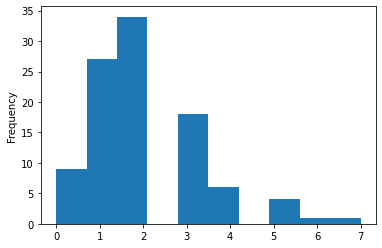

In [6]:
sample = stats.poisson.rvs(2, size=100)
pd.Series(sample).plot.hist()
plt.show()

Exponential Distribution

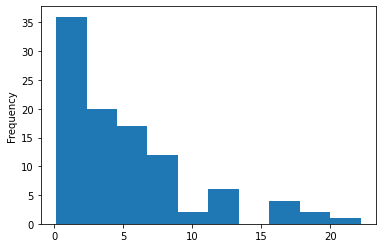

In [10]:
sample = stats.expon.rvs(scale =5, size=100)
pd.Series(sample).plot.hist()
plt.show()

Weibull Distribution

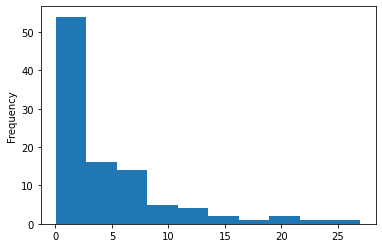

In [16]:
sample = stats.weibull_min.rvs(0.9, scale =5, size=100)
pd.Series(sample).plot.hist()
plt.show()